# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer
import copy
import matplotlib.pyplot as plt

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()


In [2]:
print(f"Size of breast_cancer[data] is ({np.size(breast_cancer['data'],0)}, {np.size(breast_cancer['data'],1)})")

print(f"Size of diabetes[data] is ({np.size(diabetes['data'],0)}, {np.size(diabetes['data'],1)})")


Size of breast_cancer[data] is (569, 30)
Size of diabetes[data] is (442, 10)


In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [3]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [4]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

Because otherwise the target is a list and not a vector or matrix with one column. This is needed for matrix calculations.

In [5]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
# X_train = diabetes.data[:300, np.newaxis, 3]
# y_train = diabetes.target[:300, np.newaxis]
# X_test = diabetes.data[300:, np.newaxis, 3]
# y_test = diabetes.target[300:, np.newaxis]
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [6]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
sys.path.append('code/')

# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train_db = diabetes.data[:300, :]
y_train_db = diabetes.target[:300, np.newaxis]
X_test_db = diabetes.data[300:, :]
y_test_db = diabetes.target[300:, np.newaxis]

beta = lsq(X_train_db, y_train_db)


#Mean Squared Error (MSE)
#MSEtest=||ytestpred - ytest||^^2
#MSEtest=||Xtest w - ytest||^^2
X_test_add = np.concatenate((np.ones((X_test_db.shape[0],1)),X_test_db),axis = 1)
y_pred= np.dot(X_test_add,beta)
MSE = np.square(y_pred - y_test_db).mean()
print(MSE)

2794.569014500737


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

$WLS(\beta)=\sum \limits_{i=1}^{n} d_i(y_i-\mathbf{x}_i^t \beta) ^2$<br>


The weights of each feature is given in vector $\mathbf{d}$. The values of this vector are the diagonal elements of matrix D given in the expression below.
$WLS= D(y-X\beta)^T (y-X\beta)$ <br>
$=D(y^Ty - y^TX\beta - yX^T\beta^T + X\beta X^T\beta)$<br>
<br>
given that the transpose of a scalar is the scalar ($y^TX\beta = yX^T\beta^T$) the expression can be written as:<br>
$=D(y^Ty - 2yX^T\beta^T + X\beta X^T\beta)$<br>
<br>
To find a minimum we differentiate with respect to $\beta$ and find the solution for 0:<br>
$-2DyX^T +2DXX^T\beta =0$<br>
$D(yX^T-XX^T\beta)=0$<br>
$DyX^T=DXX^T\beta$<br>
$\beta=DyX^T(DXX^T)^{-1}$

### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

We have implemented a k-NN classification model on the dataset. It has been chosen to use 400 of the 569 patients for the training data, so that the total database is splitted into 70 % training data and 30 % test data. By looking at the k nearest neighbours, a classification is made for every line in the test data set and evaluated according to the number of incorrect classified cells. When running the script it can be seen that for a value of k=1, the number of incorrect classified cells is very high due to overfitting of the datapoints in the trainingdata. It is seen that the value of k=9 results in the lowest number of incorrect classified cells, namely 11. Interestingly enough, the number of incorrect classified cells remains the same for values 9 untill 17, but increases for even higher number of k due to underfitting. 
Besides the number of incorrect classified cells, the accuracy is calculated as well according to the formula: accuracy = (TP + TN)/(TP + FP + TN + FN). This has also been done for the sensitivity, specificity and the precision. Because the dataset is not evenly divided, the F1 value has also been calculated.

In the plots of the specificity and precision, it can be seen that there are no false positive values for a value of k = 5. It also contains the minimal number of false negatives as seen in the sensitivity plot. Despite of the slightly unbalanced database, the plot of the F1 values is very similar of that of the accuracy and the number of incorrect classified cells. The only difference is that the scale is slightly different.

In [7]:
def normalize_data(data):
    
    '''Objective: normalize columns of a pandas dataset to set the mean of the values 
    to 0 and the std to 1. This has been done using the created functions average() and std()
    
    Input:
    data: dataset to be normalized
        First column of dataset is a list with genenames, and will not be normalized
        The rest of the columns will be normalized
        
    Output:
    data: normalized data
    '''
    for i in range(np.size(data,1)):
        column = data[:,i]
        mean_column = np.mean(column)
        std_column = np.std(column)

    #     # Subtract mean
        column = column - mean_column

    #     # Divide by standard deviation
        column = column/std_column
        data[:,i] = column
    return data

X_train_bc = breast_cancer.data[:400,:]
y_train_bc = breast_cancer.target[:400, np.newaxis]
X_test_bc = breast_cancer.data[400:,:]
y_test_bc = breast_cancer.target[400:, np.newaxis]

# print(f' before normalization, the mean of the first feature is  {np.mean(X_train_bc[:,0])} and the std is {np.std(X_train_bc[:,0])}.')

X_train_bc = normalize_data(X_train_bc)
X_test_bc = normalize_data(X_test_bc)

# print(f' after normalization, the mean of the first feature is  {np.mean(X_train_bc[:,0])} and the std is {np.std(X_train_bc[:,0])}.')





In [8]:
def calc_distance(method = 'squared-Euclidean',list1=[],list2=[]):
    '''function that calculates the distance between two lists
    
    Input:
    method: method of distance calculation. Can either be squared-Euclidean or Euclidean.
    list1 and list2: lists of values in all dimension, of which the distance has to calculated for
                    list1 and list2 should be of the same length
                    , otherwise you will get an error.'''
    if len(list1)!= len(list2):
        print(len(list1))
        print(len(list2))
        raise Exception("list1 and list2 in calc_distances(method,list1,list2) are not of the same length")
    tot_dist = 0
    for n in range(len(list1)):
        
        dist = (list1[n]-list2[n])**2
        tot_dist+=dist
    tot_dist = tot_dist**0.5
    return tot_dist




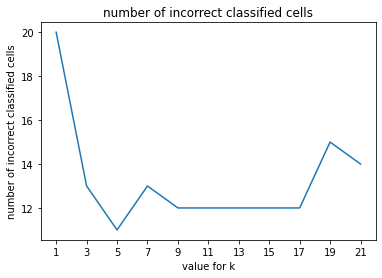

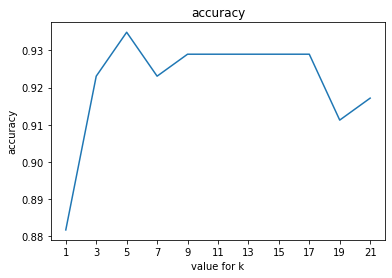

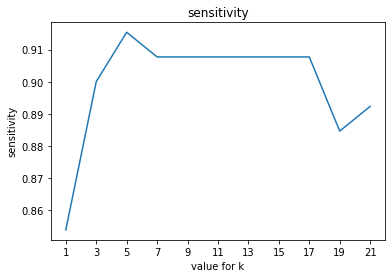

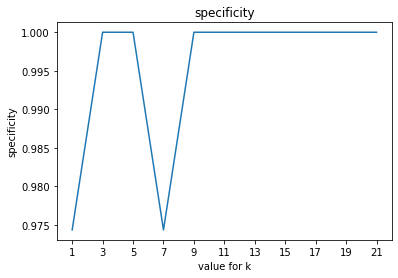

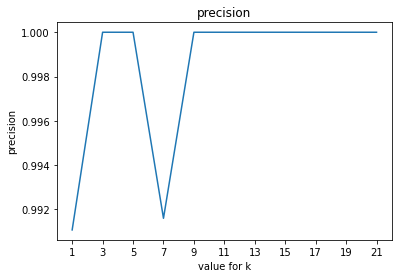

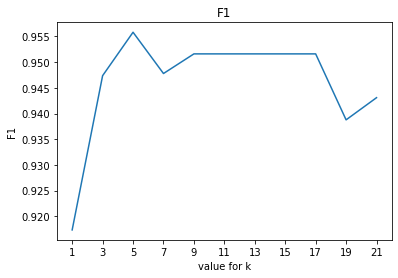

In [9]:
def k_nn_classification(classification = 1, X_train=[],y_train = [],X_test=[],K=5):
    '''Function to perform k-nn classification of all test data in respect to the training data.
    It loops over all the positions in the training data but than uses matrix calculation to calculate the distances to all points.
    '''

    
    test_output = np.zeros((X_test.shape[0],1)) #output for all test data
    

    for y in range(np.size(X_test,0)):

        distances = list(np.sum((X_train-X_test[y])**2,axis = 1)**0.5)

        i = 1

        y_train_copy = copy.deepcopy(y_train)
        targets = 0 #sum of targets of all K nearest neighbours
        while i<=K:
            index_min = distances.index(min(distances))
            target = y_train_copy[index_min]
            del distances[index_min] 
            y_train_copy = np.delete(y_train_copy,index_min)
            targets+= target
            i+=1
            if i>K:
                if classification ==1:
                    test_output[y] = round(int(targets)/K+1)-1 #target for specific test cell
                else:
                    test_output[y] = float(targets)/K #mean value of the value of the K nearest neighbours
                break
                

            

    return test_output


    




# def plot_different_k_nn_classification_old(X_train=[],y_train = [],X_test=[],y_test=[],k_list = [1,3,5,7,9,11,13,15,17,19,21]):
#     '''Function that performs k-nn for a range of k-values and plots the number of incorrect classified cells per k-value.
    
#     '''
#     incorrect_list = []
#     accuracy_list = []
    
#     for k in k_list:
#         test_output = k_nn_classification(1,X_train,y_train,X_test,k)
#         abs_difference = abs(test_output-y_test)
#         incorrect = int(sum(abs_difference))
#         incorrect_list.append(incorrect)
#         accuracy = list(abs_difference).count(0)/len(abs_difference)
#         accuracy_list.append(accuracy)
        
#     plt.figure()        
#     plt.plot(k_list,incorrect_list)
#     plt.plot(k_list[incorrect_list.index(min(incorrect_list))],min(incorrect_list),'ro')
#     plt.xticks(k_list)
#     plt.yticks(list(range(min(incorrect_list),max(incorrect_list)+1)))
#     plt.ylabel('number of incorrect classified')
#     plt.xlabel('value for k')
#     plt.title('number of incorrect classified')
        
#     plt.figure()        
#     plt.plot(k_list,accuracy_list)
#     plt.xticks(k_list)
#     plt.ylabel('accuracy [-]')
#     plt.xlabel('value for k')
#     plt.title('accuracy')

def plot_different_k_nn_classification(X_train=[],y_train = [],X_test=[],y_test=[],k_list = [1,3,5,7,9,11,13,15,17,19,21]):
    '''Function that performs k-nn for a range of k-values and plots the number of incorrect classified cells per k-value.
    
    '''
    rows = ["number of incorrect classified cells","accuracy","sensitivity","specificity","precision","F1"]
    classification_matrix = np.zeros((len(rows),len(k_list)))
    
    for k in range(len(k_list)):
        test_output = k_nn_classification(1,X_train,y_train,X_test,k_list[k])
        FP = 0
        TP = 0
        FN = 0
        TN = 0
        for i in range(len(test_output)):
            if test_output[i]==1 and test_output[i] == y_test[i]:
                TP+=1
            elif test_output[i]==0 and test_output[i] == y_test[i]:
                TN+=1
            elif test_output[i]==1 and test_output[i] != y_test[i]:
                FP+=1
            elif test_output[i]==0 and test_output[i] != y_test[i]:
                FN+=1
                

        sensitivity = TP/(TP+FN)
        precision = TP/(TP+FP)
        classification_matrix[:,k] = [(FN+FP),(TP+TN)/(TP+TN+FN+FP),sensitivity,TN/(TN+FP),TP/(TP+FP),2*precision*sensitivity/(precision+sensitivity)]
    
    for row in range(len(rows)): 
        plt.figure()        
        plt.plot(k_list,classification_matrix[row,:])
        plt.xticks(k_list)
        plt.ylabel(rows[row])
        plt.xlabel('value for k')
        plt.title(rows[row])
        
    

plot_different_k_nn_classification(X_train = X_train_bc,y_train = y_train_bc,X_test = X_test_bc,y_test = y_test_bc)

### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

The script for k_nn_classification can also be used for regression, where only the first input parameter should be changed to 0. Now the mean value of the nearest neighbours is returned, instead of the rounded probability. This is analysed using the same Mean Squared Error as for Linear Regression. Because this calculation is used twice, it has been considered to make an individual function for this, but because it is only one line, it has been chosen not to do this. The minimal value of 3065.7991373848627 for a value of k= 17. This MSE is higher than the MSE error for the linear regression model, meaning that for this database, the linear regression model gives a better prediction than the k-nn regression model.

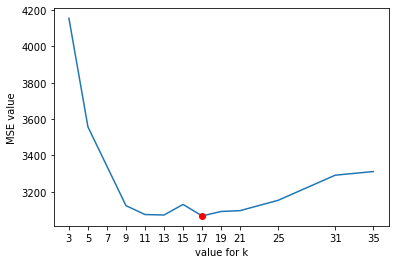

In [10]:
def plot_different_k_nn_regression(X_train=[],y_train = [],X_test=[],y_test=[],k_list = [3,5,7,9,11,13,15,17,19,21]):
    '''Function that performs k-nn for a range of k-values and plots the number of incorrect classified cells per k-value.
    
    '''
    MSE_list = []

    for k in k_list:
        test_output = k_nn_classification(0,X_train,y_train,X_test,k)
        MSE = np.square(test_output - y_test).mean()
        MSE_list.append(MSE)
        
    plt.figure()        
    plt.plot(k_list,MSE_list)
    plt.xticks(k_list)
    plt.ylabel('MSE value')
    plt.xlabel('value for k')
    plt.plot(k_list[MSE_list.index(min(MSE_list))],min(MSE_list),'ro')
X_train_db = normalize_data(X_train_db)
X_test_db = normalize_data(X_test_db)
plot_different_k_nn_regression(X_train = X_train_db,y_train = y_train_db,X_test=X_test_db,y_test=y_test_db,k_list = [3,5,7,9,11,13,15,17,19,21,25,31,35])




### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>



[0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1
 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1]


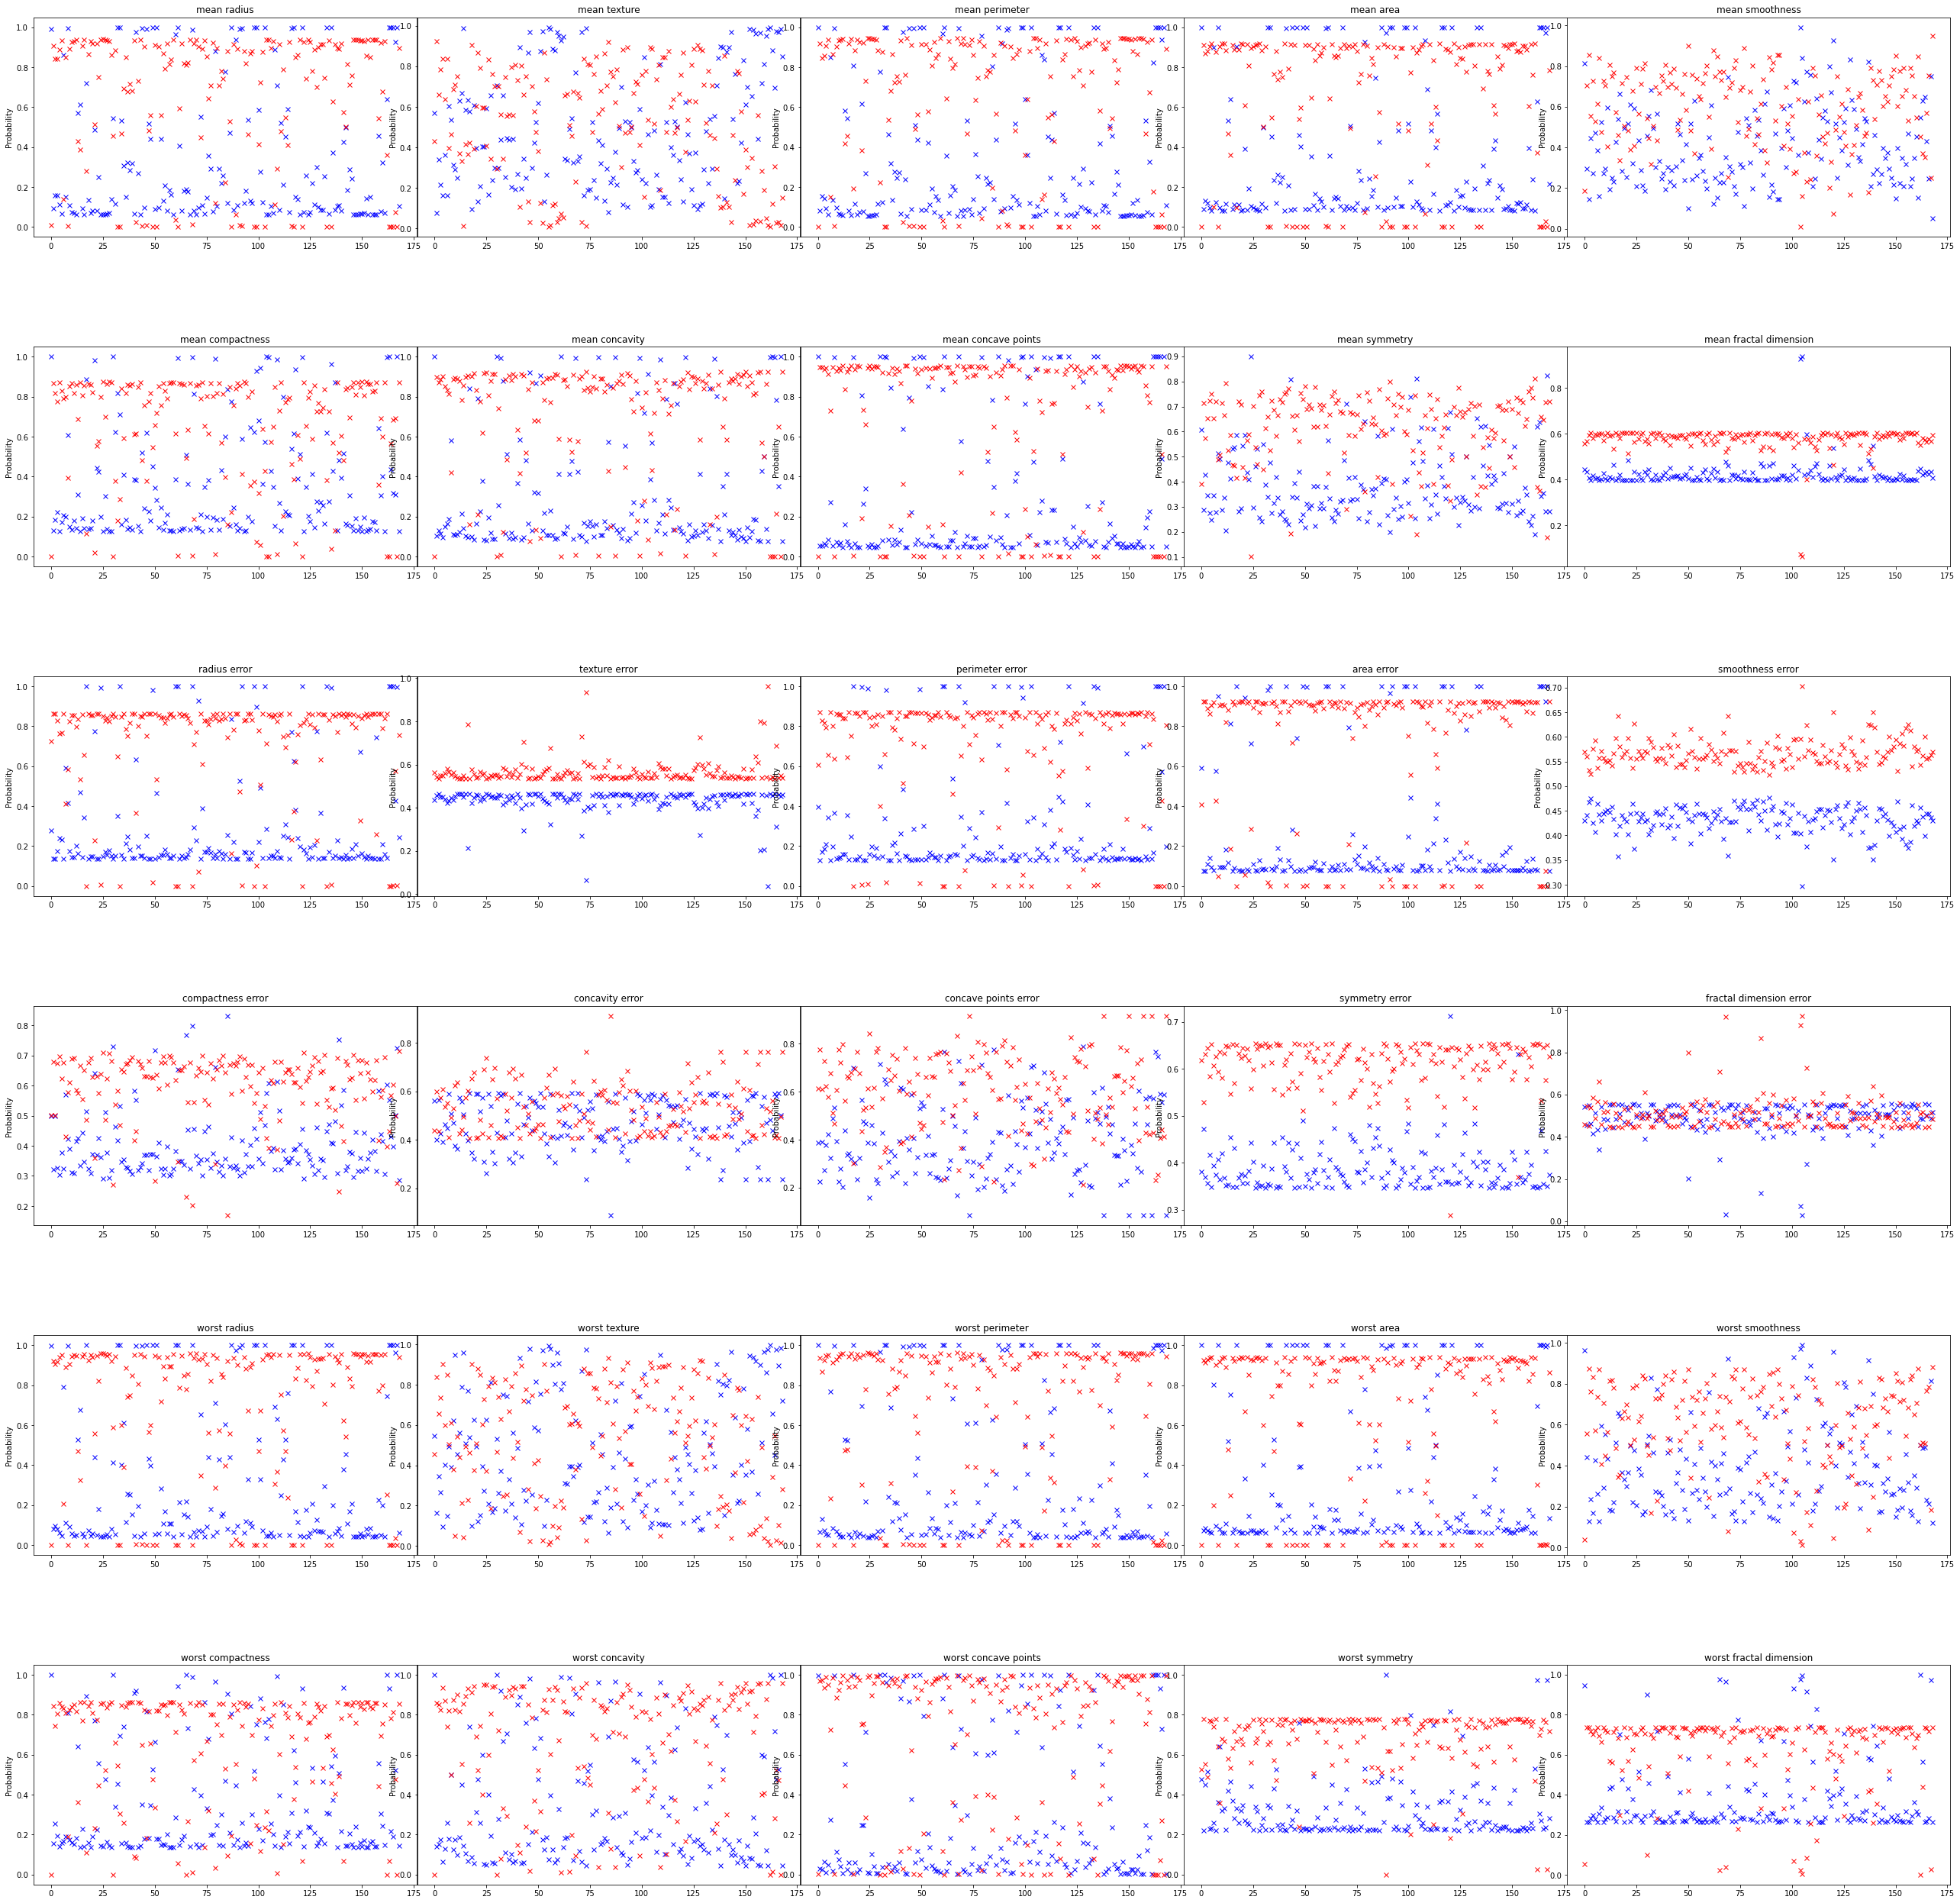

In [12]:

#places the classes as keys in a dictionary, with an array as value containing:mean,std,length
def separate_classes(dataset):
    dct = {}
    for i in dataset:
        target = i[1]
        value = i[0]
        if(target not in dct):
            dct[target] = list()
            dct[target].append(value)  
        else:
            dct[target].append(value)
    for i in dct.keys():
        dct[i] = [(np.mean(dct[i]),np.std(dct[i]),len(dct[i]))]
    return dct


# Gaussian probability distribution function for x
def gauss(x, mean, std):
    gaussian=(1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x-mean)**2 / (2 * std**2 )))
    return gaussian
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(data_sum, row):
    rows = sum([data_sum[label][0][2] for label in data_sum]) #heel abstract
    probabilities = dict()
    for c_value, c_data in data_sum.items():
        probabilities[c_value] = data_sum[c_value][0][2]/float(rows)
        for i in range(len(c_data)):
            mean, std, _ = c_data[i]
            probabilities[c_value] *= gauss(row[i], mean, std)
    return probabilities
 
def normalize(prob):
    prob_factor = 1 / sum(prob)
    return [prob_factor * p for p in prob]



#start
#load data
breast_cancer = load_breast_cancer()
feature_names = breast_cancer.feature_names
test_num = 169
train_num = 400

y_train = breast_cancer.target[:train_num] #zou niet in for loop hoeven, is wel netter
y_test = breast_cancer.target[train_num:]  #zou niet in for loop hoeven, is wel netter
print(y_test)

#create matrix for probability
probability_zero = np.ones((test_num,30))
probability_one = np.ones((test_num,30))

#go through every feature
for k in range(0,len(feature_names)):
    X_train = breast_cancer.data[:train_num, k]
    X_test = breast_cancer.data[train_num:, k]

    #Create datasets which contains the values for the k-feature and the corresponding target
    dataset = np.ones((len(X_train),2))
    dataset_test = np.ones((len(X_test),2))
    
    for i in range(0,len(X_train)):
        dataset[i] = [X_train[i],y_train[i]]
    for q in range(0,len(X_test)):
        dataset_test[q] = [X_test[q],y_test[q]]
    
    #create dict with classes as keys, and values of mean,std,length
    data_sum = separate_classes(dataset)

    for j in range(0,len(y_test)):
        probability = calculate_class_probabilities(data_sum, dataset_test[j])
        prob_zero = probability[0]
        prob_one = probability[1]
        probs = [prob_zero,prob_one]
        prob_zero,prob_one = normalize(probs)
        
        probability_zero[j,k] = prob_zero
        probability_one[j,k] = prob_one

fig, axs = plt.subplots(6,5, figsize=(45, 45), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(30):

    axs[i].plot(probability_zero[:,i], 'bx', label='malignant')
    axs[i].plot(probability_one[:,i], 'rx', label='benign')
    
    axs[i].set_title(feature_names[i])
    axs[i].set_ylabel('Probability')
